 # MPA-MLF, Lab 7 - Convolutional Neural Network

## Exercise - Hand-written digits recognition

Create CNN which will process and recognize handwritten digits. For this purposes please use the MNIST database (Modified National Institute of Standards and Technology database) which is a large database of handwritten digits that is commonly used for training various image processing systems.

The datasample of the MNIST datasets can be see in the following picture

![mnist_data_sample.png](attachment:eb3e0d6a-ccb0-499d-9847-ecbc554dbce0.png)

### Task description

In the terms of machine learning, the Hand-written digits recognition can be threated as a multi-class classification problem. This is very important knowledge to structure our model in the correct way (Especially the output-layer, including the number of neurons and activations function and the overall loss function and classification metrics)

### 0. Import libraries

Import the all necessary libraries, you can get inspired by the previous exercises. You can improst the libraries gradually, when do you progressing with the task

In [1]:
from tensorflow import keras
from keras.models import Sequential
from keras.datasets import mnist




import numpy as np
import matplotlib
import matplotlib.pyplot as plt
###################################
# Write your own code here #

from keras.optimizers import Adam

###################################
font = {'weight' : 'bold',
        'size'   : 12}

matplotlib.rc('font', **font)

### 1. Dataset

#### 1.1 Load Dataset

You can load the dataset using the following code

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


#### 1.2 Dataset examination

Using the following code, display random images,

In [3]:
def display_random_images(x_data: np.array, y_data: np.array, count: int = 10) -> None:
  index = np.array(len(x_data))
  selected_ind = np.random.choice(index, count)

  selected_img = x_data[selected_ind]
  selected_labels = y_data[selected_ind]
  concat_img = np.concatenate(selected_img, axis=1)

  plt.figure(figsize=(20,10))
  plt.imshow(concat_img, cmap="gray")

  for id_label, label in enumerate(selected_labels):
    plt.text(14 + 28*id_label, 28*(5/4), label)
  plt.axis('off')
  plt.show()

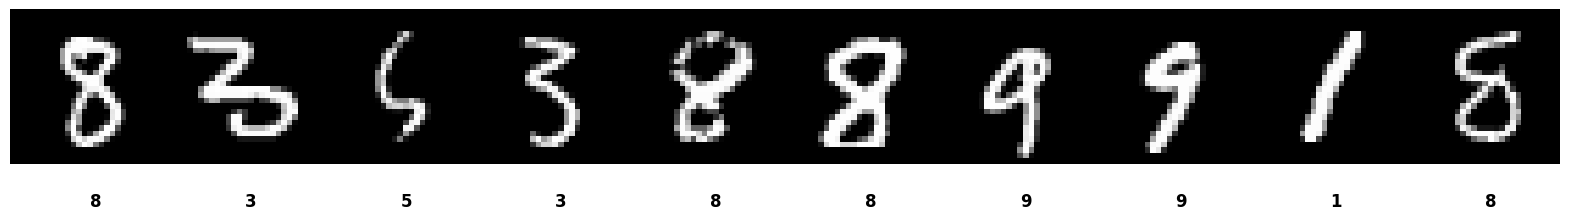

In [4]:
display_random_images(X_train, y_train)

Examine the dataset. Answer for yourself the following questions:

- What kind of data occurs in our dataset?
- How many data samples do we have in train and test datasets?
- How many colour channels does the input variable have?
- What is the size of the input images?
- What is the necessary preprocessing of the input data X?
- How many classes do we have in target varoable?
- What is the necessary preprocessing of target variable y?

In [6]:
from tensorflow.keras.utils import to_categorical

train_samples = X_train.shape[0]
test_samples = X_test.shape[0]

channels = 1

image_size = X_train.shape[1:3]

X_train_norm = X_train.reshape((train_samples, 28, 28, channels)).astype('float32') / 255
X_test_norm = X_test.reshape((test_samples, 28, 28, channels)).astype('float32') / 255

num_classes = len(np.unique(y_train))


# One-hot encode the labels
y_train_encoded = to_categorical(y_train, num_classes)
y_test_encoded = to_categorical(y_test, num_classes)

# Print the answers
print("1. What kind of data occurs in our dataset?")
print("Handwritten digit images (0-9) in grayscale.")

print("2.How many data samples do we have in train and test datasets?")
print(f"Number of training samples: {train_samples}")
print(f"Number of test samples: {test_samples}")

print("3. How many colour channels does the input variable have?")
print(f"Number of color channels: {channels}")

print("4. What is the size of the input images?")
print(f"Image size: {image_size[0]}x{image_size[1]} pixels")

print("5. Necessary preprocessing of the input data X")
print('Normalize pixel values and add a channel dimensio')

print("6. How many classes do we have in target variable?")
print(f"Number of classes: {num_classes}")

print("7. Necessary preprocessing of target variable y")
print(f"Shape of X_train after normalization and reshaping: {X_train_norm.shape}")
print(f"Shape of y_train after one-hot encoding: {y_train_encoded.shape}")

Number of training samples: 60000
Number of test samples: 10000
Image size: 28x28 pixels
Number of color channels: 1
Number of classes: 10
Shape of X_train after normalization and reshaping: (60000, 28, 28, 1)
Shape of y_train after one-hot encoding: (60000, 10)


Kind of Data: The MNIST dataset consists of grayscale images of handwritten digits (0 to 9).

Number of Data Samples:

Training Dataset: The training dataset (X_train) contains 60,000 samples.
Test Dataset: The test dataset (X_test) contains 10,000 samples.

Color Channels of Input Variable: MNIST images are grayscale, so they have a single color channel.

Size of Input Images:
MNIST images are 28x28 pixels in size.

Preprocessing of Input Data X:
The input data X (both X_train and X_test) needs to be reshaped to include a channel dimension for compatibility with Keras.
Normalize pixel values to fall within the range [0, 1]. Currently, pixel values range from 0 to 255, so dividing by 255 will normalize them.
Number of Classes in Target Variable:

There are 10 classes in the target variable y, corresponding to digits 0 through 9.
Preprocessing of Target Variable y:

The target variable y (both y_train and y_test) typically does not require additional preprocessing for classification tasks. However, if using categorical cross-entropy loss, you might want to one-hot encode the target labels. Keras provides utilities for this purpose.

#### 1.3 Dataset preprocessing

Perform the necessary data preprocessing. The best way to preprocess the data would be one hot encoding for the target variable and normalization for the input variable (using min-max or z-score normalization)

In [7]:
# Normalize the input images to the range [0, 1]
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

# Reshape the input data to include the channel dimension (required for Keras CNNs)
# MNIST images are grayscale, so we use 1 channel
X_train_normalized = X_train_normalized.reshape((-1, 28, 28, 1))
X_test_normalized = X_test_normalized.reshape((-1, 28, 28, 1))

# One-hot encode the labels
y_train_encoded = to_categorical(y_train, 10)
y_test_encoded = to_categorical(y_test, 10)

print("Data preprocessing complete.")
print(f"Shape of training data: {X_train_normalized.shape}")
print(f"Shape of training labels: {y_train_encoded.shape}")

Data preprocessing complete.
Shape of training data: (60000, 28, 28, 1)
Shape of training labels: (60000, 10)


### 2. Build the model

In this section, your task will be to define the model architecture. The intial structure can be defined as follows:

Input_layer -> Convolutional_layer(kernel_size=(3,3), no_channels=32) -> Maxpooling_layer(kernel_size=(2, 2)) -> Flatten_layer -> Dense_layer (num_classes)
    
    


#### 2.1 Define the model structure

In [8]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

num_classes = 10

model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),

    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),

    Dense(num_classes, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 2.2 Compile the model

Build the model, use the relevant metrics, optimizer and loss function. While choosing the metrics and loss function, consider fact that we are are trying to solve the multiclass classification problem

In [10]:
loss = None
optimizer = None
metrics = None
learning_rate = 0.001

loss = 'categorical_crossentropy'
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)
metrics = ['accuracy']

model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54410 (212.54 KB)
Trainable params: 54410 (212.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 3. Training stage

#### 3.1 Model training

train your model, define the relevant hyperparameters (no. epochs, batch_size), use 20p of the training data for validation

In [11]:

epochs = 10
batch_size = 32
validation_split = 0.2

history = model.fit(
    X_train_normalized, y_train_encoded,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation_split
)

Epoch 1/10
1500/1500 [==============================] - 28s 18ms/step - loss: 0.2426 - accuracy: 0.9310 - val_loss: 0.1068 - val_accuracy: 0.9723
Epoch 2/10
1500/1500 [==============================] - 33s 22ms/step - loss: 0.0891 - accuracy: 0.9748 - val_loss: 0.0803 - val_accuracy: 0.9776
Epoch 3/10
1500/1500 [==============================] - 22s 15ms/step - loss: 0.0660 - accuracy: 0.9806 - val_loss: 0.0802 - val_accuracy: 0.9767
Epoch 4/10
1500/1500 [==============================] - 24s 16ms/step - loss: 0.0542 - accuracy: 0.9835 - val_loss: 0.0744 - val_accuracy: 0.9783
Epoch 5/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0465 - accuracy: 0.9857 - val_loss: 0.0621 - val_accuracy: 0.9815
Epoch 6/10
1500/1500 [==============================] - 19s 13ms/step - loss: 0.0404 - accuracy: 0.9878 - val_loss: 0.0663 - val_accuracy: 0.9818
Epoch 7/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.0341 - accuracy: 0.9891 - val_loss: 0.0642 -

#### 3.1 Model Evaluation on validation data

Plot the development of the training and validation loss, and training and validation metrics.

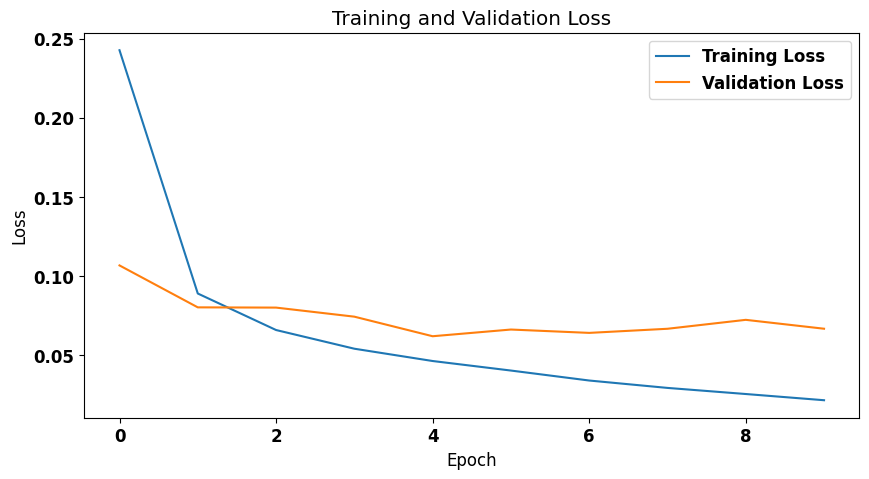

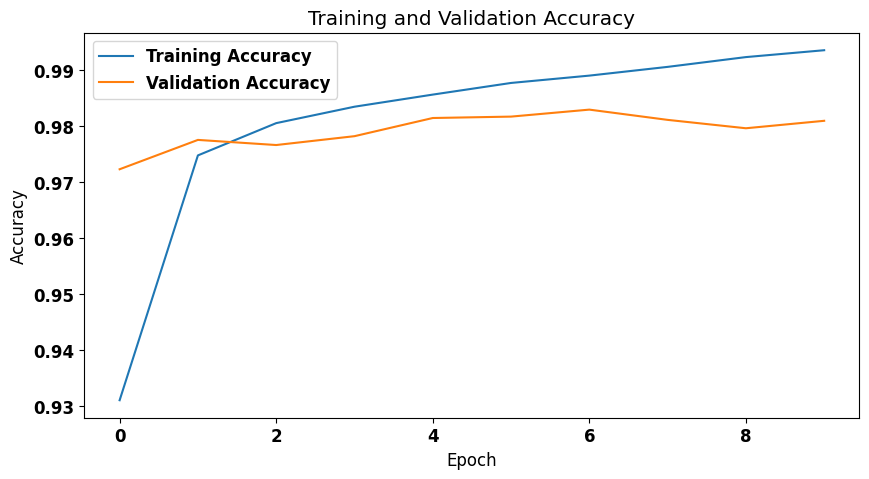

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### 4. Model evaluation

Evaluate the model on the testing dataset using the relevant metrics. Use the confusion metrics as the one of the metrics.

In [13]:
from sklearn.metrics import confusion_matrix


loss, accuracy = model.evaluate(X_test_normalized, y_test_encoded)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


y_pred = model.predict(X_test_normalized)
y_pred_classes = np.argmax(y_pred, axis=1)


conf_matrix = confusion_matrix(np.argmax(y_test_encoded, axis=1), y_pred_classes)
print('Confusion Matrix:')
print(conf_matrix)

313/313 [==============================] - 1s 4ms/step - loss: 0.0617 - accuracy: 0.9815
Test Loss: 0.0617
Test Accuracy: 0.9815
313/313 [==============================] - 1s 4ms/step
Confusion Matrix:
[[ 965    0    2    1    0    1    5    0    6    0]
 [   0 1125    3    2    2    1    0    0    2    0]
 [   0    1 1014    1    2    1    1    6    6    0]
 [   0    0    1  995    0   11    0    0    3    0]
 [   0    0    0    0  971    0    2    0    2    7]
 [   0    0    0    4    0  886    2    0    0    0]
 [   5    2    0    1    2    3  942    0    3    0]
 [   0    6   12    7    2    1    0  989    5    6]
 [   5    0    2    4    0    3    2    2  954    2]
 [   1    1    0    4   10    8    0    3    8  974]]


### 5. Hyperparameter tunning and regularization techniques

When your code is ready and fully functional, try several changes in the hyperparameters and see how they influence the testing metrics. Try changes in the network structure. You can also try adding regularization techniques such as L1, L2, and Dropout. Based on the development of training and validation loss, try to identify overfitting and avoid it

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten_1 (Flatten)         (None, 1600)             

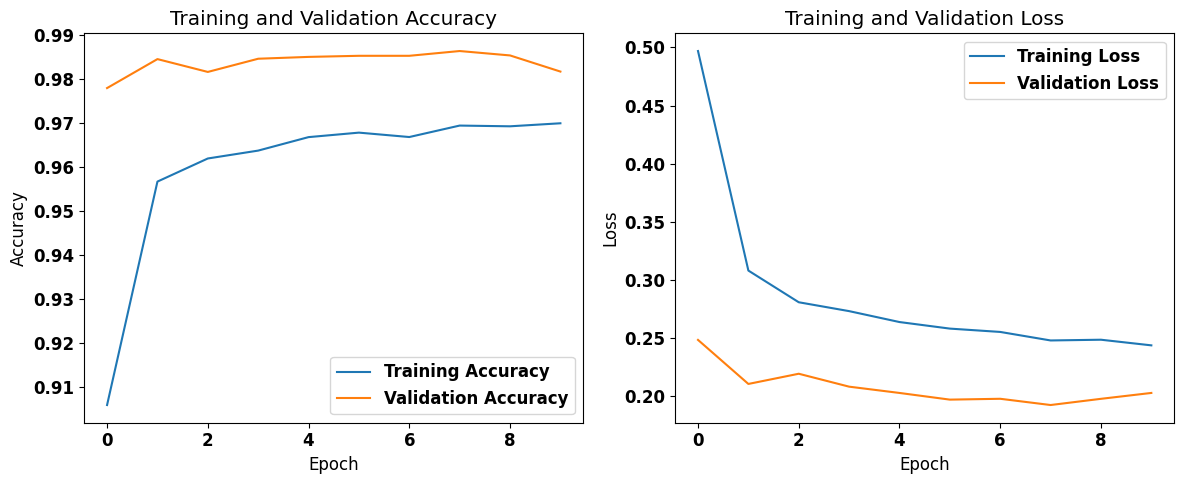

In [14]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.regularizers import l2
from tensorflow.keras.optimizers import Adam

def build_model(learning_rate=0.001, dropout_rate=0.5, l2_lambda=0.001):
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1),
               kernel_regularizer=l2(l2_lambda)),
        MaxPooling2D(pool_size=(2, 2)),

        Conv2D(64, (3, 3), activation='relu', kernel_regularizer=l2(l2_lambda)),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(dropout_rate),

        Flatten(),

        Dense(128, activation='relu', kernel_regularizer=l2(l2_lambda)),
        Dropout(dropout_rate),

        Dense(10, activation='softmax')
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

learning_rate = 0.001
dropout_rate = 0.5
l2_lambda = 0.001

model = build_model(learning_rate, dropout_rate, l2_lambda)
model.summary()

epochs = 10
batch_size = 32
validation_split = 0.2

history = model.fit(
    X_train_normalized, y_train_encoded,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation_split,
    verbose=1
)

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()